In [1]:
!pip install contractions

In [2]:
#Importing All Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    r2_score
)
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer
)

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hps79\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hps79\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hps79\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data=pd.read_csv("Dataset-SA.csv")

In [4]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [5]:
data.shape

(205052, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [7]:
data["Rate"].unique()

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

In [8]:
data["Rate"].value_counts()

Rate
5                                                                    118765
4                                                                     41894
1                                                                     21300
3                                                                     16599
2                                                                      6491
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)              1
Bajaj DX 2 L/W Dry Iron                                                   1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)         1
Name: count, dtype: int64

In [9]:
rate=["1","2","3","4","5"]
data = data[data["Rate"].isin(rate)]

In [10]:
data["Rate"].value_counts()

Rate
5    118765
4     41894
1     21300
3     16599
2      6491
Name: count, dtype: int64

In [11]:
data["Rate"] = pd.to_numeric(data["Rate"])
data["product_price"] = pd.to_numeric(data["product_price"])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205049 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205049 non-null  object
 1   product_price  205049 non-null  int64 
 2   Rate           205049 non-null  int64 
 3   Review         180385 non-null  object
 4   Summary        205038 non-null  object
 5   Sentiment      205049 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.0+ MB


In [13]:
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [16]:
data.shape

(180376, 6)

In [17]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [18]:
pd.set_option('display.max_colwidth', None)
data.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,3,fair,the quality is good but the power of air is decent,positive
3,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,1,useless product,very bad product its a only a fan,negative
4,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,3,fair,ok ok product,neutral
5,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,awesome,the cooler is really fantastic and provides good air flow highly recommended,positive
6,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,highly recommended,very good product,positive
7,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,3,nice,very nice,positive
8,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,1,unsatisfactory,very bad cooler,negative
9,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,4,worth the money,very good,positive


In [19]:
data = data.rename(columns={"product_name":"Name","product_price":"Price"})

In [20]:
data

,Name,Price,Rate,Review,Summary,Sentiment
0,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,3,fair,the quality is good but the power of air is decent,positive
3,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,1,useless product,very bad product its a only a fan,negative
4,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)",1299,5,must buy!,good product,positive
205048,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)",1299,5,super!,nice,positive
205049,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)",1299,3,nice,very nice and fast delivery,positive
205050,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)",1299,5,just wow!,awesome product,positive


In [21]:
df=data.copy()

In [22]:
same=data.drop(columns={"Rate","Review","Summary","Sentiment"})

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
same['Name'] = label_encoder.fit_transform(same['Name'])

In [24]:
same["Name"].nunique()

841

In [25]:
data.columns

Index(['Name', 'Price', 'Rate', 'Review', 'Summary', 'Sentiment'], dtype='object')

In [26]:
data_1=df.drop(['Price', 'Rate', 'Review', 'Summary', 'Sentiment'],axis=1)

In [27]:
data.drop("Name",axis=1,inplace=True)

In [28]:
data

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3999,3,fair,the quality is good but the power of air is decent,positive
3,3999,1,useless product,very bad product its a only a fan,negative
4,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...
205047,1299,5,must buy!,good product,positive
205048,1299,5,super!,nice,positive
205049,1299,3,nice,very nice and fast delivery,positive
205050,1299,5,just wow!,awesome product,positive


In [29]:
data_1

,Name
0,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)"
1,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)"
2,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)"
3,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)"
4,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)"
...,...
205047,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)"
205048,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)"
205049,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)"
205050,"cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÃÂ ÃÂ (White, Microwave Safe)"


### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [31]:
data

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3999,3,fair,the quality is good but the power of air is decent,positive
3,3999,1,useless product,very bad product its a only a fan,negative
4,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...
205047,1299,5,must buy!,good product,positive
205048,1299,5,super!,nice,positive
205049,1299,3,nice,very nice and fast delivery,positive
205050,1299,5,just wow!,awesome product,positive


### **Parse and remove HTML tags**: Extract the plain text from HTML content by removing any HTML tags.

# HTML Parsing: Removing HTML Tags from Text

In this notebook, we will demonstrate how to parse and remove HTML tags from text data using the **BeautifulSoup** library. This is a common task when dealing with web scraped data, as HTML tags often need to be stripped away in order to extract just the meaningful text.

## What is HTML Parsing?

**HTML parsing** refers to the process of analyzing and extracting information from HTML documents. In the context of text processing, we often need to remove the HTML tags to get clean, readable text.

### Why Remove HTML Tags?

HTML tags like `<p>`, `<a>`, `<div>`, etc., are used for structuring web pages. However, for most text analysis tasks, such tags are unnecessary and can be removed to leave just the text content. Parsing HTML content and removing these tags ensures that only the meaningful content is retained.

## Removing HTML Tags with BeautifulSoup

We will use the **BeautifulSoup** library, which provides a simple way to extract and manipulate text from HTML documents. The `BeautifulSoup` class has a method `get_text()` that allows us to get the text content from an HTML document, stripping out all tags.


In [33]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Review'] = data['Review'].apply(lambda x: strip_html(x))
data['Summary'] = data['Summary'].apply(lambda x: strip_html(x))

data.head(10)

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3999,3,fair,the quality is good but the power of air is decent,positive
3,3999,1,useless product,very bad product its a only a fan,negative
4,3999,3,fair,ok ok product,neutral
5,3999,5,awesome,the cooler is really fantastic and provides good air flow highly recommended,positive
6,3999,5,highly recommended,very good product,positive
7,3999,3,nice,very nice,positive
8,3999,1,unsatisfactory,very bad cooler,negative
9,3999,4,worth the money,very good,positive


### Replacing Contractions

In many cases, text data can contain contractions, such as "I'm", "don't", "can't", etc. These contractions can complicate natural language processing (NLP) tasks like tokenization and sentiment analysis. To standardize the text and avoid issues, it's often useful to expand these contractions into their full forms.

We will use the `contractions` library to replace contractions.

In [35]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['Review'] = data['Review'].apply(lambda x: replace_contractions(x))
data['Summary'] = data['Summary'].apply(lambda x: replace_contractions(x))

data.head(10)

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3999,3,fair,the quality is good but the power of air is decent,positive
3,3999,1,useless product,very bad product its a only a fan,negative
4,3999,3,fair,ok ok product,neutral
5,3999,5,awesome,the cooler is really fantastic and provides good air flow highly recommended,positive
6,3999,5,highly recommended,very good product,positive
7,3999,3,nice,very nice,positive
8,3999,1,unsatisfactory,very bad cooler,negative
9,3999,4,worth the money,very good,positive


# Removing Numbers from Text Columns

In this notebook, we will demonstrate how to **remove numbers** from text data in specific columns of a DataFrame. We will use Python's **regular expressions (regex)** to identify and eliminate any numeric characters from the text.

## Why Remove Numbers?

In many text analysis tasks, numerical values are not always relevant, and removing them can help clean the data. For example, in a dataset of reviews, removing numbers from the review text or summary might help focus on the actual content rather than specific figures (e.g., ratings or quantities).

## 1. Define the Function to Remove Numbers

We will define a function called `remove_numbers` that will use the `re.sub()` method from Python's `re` module to find and replace numbers with an empty string (effectively removing them).

**Explanation:**
**re.sub(r'\d+', '', text):**
This method searches the text for digits (\d+), which represents one or more digits, and replaces them with an empty string (''), effectively removing them from the text.


In [37]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Review'] = data['Review'].apply(lambda x: remove_numbers(x))
data['Summary'] = data['Summary'].apply(lambda x: remove_numbers(x))

data.head(10)

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,3999,5,awesome,best budget fit cooler nice cooling,positive
2,3999,3,fair,the quality is good but the power of air is decent,positive
3,3999,1,useless product,very bad product its a only a fan,negative
4,3999,3,fair,ok ok product,neutral
5,3999,5,awesome,the cooler is really fantastic and provides good air flow highly recommended,positive
6,3999,5,highly recommended,very good product,positive
7,3999,3,nice,very nice,positive
8,3999,1,unsatisfactory,very bad cooler,negative
9,3999,4,worth the money,very good,positive


# Tokenization: Breaking Text into Smaller Units

In this notebook, we will demonstrate how to **tokenize** text data into smaller units like words or sentences. Tokenization is a crucial step in Natural Language Processing (NLP) as it prepares the text for further analysis by breaking it down into manageable pieces.

## What is Tokenization?

**Tokenization** is the process of splitting a text into smaller units called "tokens". These tokens can be:
- **Words**: The smallest meaningful unit of text, often used in text analysis.
- **Sentences**: The larger unit of text, often used when analyzing the overall structure or meaning of a text.

### Why Tokenize?

Tokenization helps in several NLP tasks such as:
- **Text Preprocessing**: Text data needs to be split into tokens for further processing.
- **Feature Extraction**: By converting text into tokens, we can create features for machine learning models.
- **Text Analysis**: Tokenizing helps to identify individual elements, like words or phrases, in a sentence to understand its meaning.

## Word Tokenization

In word tokenization, we split a sentence into individual words. This can be done using libraries like **NLTK** (Natural Language Toolkit) 

In [39]:
data['Review'] = data.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1) # Tokenization of data
data['Summary'] = data.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1) # Tokenization of data

In [40]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hps79\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
data

,Price,Rate,Review,Summary,Sentiment
0,3999,5,"[super, !]","[great, cooler, excellent, air, flow, and, for, this, price, its, so, amazing, and, unbelievablejust, love, it]",positive
1,3999,5,[awesome],"[best, budget, fit, cooler, nice, cooling]",positive
2,3999,3,[fair],"[the, quality, is, good, but, the, power, of, air, is, decent]",positive
3,3999,1,"[useless, product]","[very, bad, product, its, a, only, a, fan]",negative
4,3999,3,[fair],"[ok, ok, product]",neutral
...,...,...,...,...,...
205047,1299,5,"[must, buy, !]","[good, product]",positive
205048,1299,5,"[super, !]",[nice],positive
205049,1299,3,[nice],"[very, nice, and, fast, delivery]",positive
205050,1299,5,"[just, wow, !]","[awesome, product]",positive


# Stopwords Removal in Text Data

In this notebook, we will demonstrate how to **remove stopwords** from text data. Stopwords are common words (such as "and", "the", "is", "in") that do not add significant meaning to text analysis and are often removed in preprocessing steps.

## What are Stopwords?

**Stopwords** are words that are considered irrelevant in many NLP tasks because they occur frequently in a language and don’t carry much meaningful information. Examples of stopwords include:
- English: "is", "the", "a", "in", "of", "to", "and"
- Other languages also have their own sets of stopwords.

Removing stopwords helps reduce the dimensionality of the data and improve the performance of machine learning models.

## Download and Load Stopwords Using NLTK

We will use the **NLTK** library, which provides a built-in list of stopwords for various languages. First, we need to download the stopwords dataset.

**Explanation:**
                                                                   
stopwords.words('english'): This method from the NLTK library provides a list of stopwords for the English language.
set(stopwords.words('english')): We convert the list of stopwords into a set, as sets are faster for membership checking, which will help in removing stopwords from text data.

In [43]:
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist))

In [44]:
len(stopwords)

146

In [45]:
stopwords

['whom',
 'until',
 'how',
 "it's",
 'who',
 'don',
 'our',
 'through',
 'more',
 'or',
 'any',
 'i',
 'yours',
 'its',
 'the',
 "you'll",
 'themselves',
 'too',
 'while',
 'was',
 'it',
 'have',
 'their',
 'theirs',
 'about',
 'both',
 'am',
 'did',
 'nor',
 'm',
 'is',
 'if',
 'but',
 'from',
 "that'll",
 'having',
 'her',
 'before',
 'where',
 'same',
 'now',
 'only',
 'what',
 'o',
 't',
 'again',
 'y',
 'are',
 'by',
 'herself',
 'to',
 'all',
 'yourself',
 'a',
 "should've",
 'doing',
 "don't",
 'here',
 'on',
 'at',
 'ain',
 'no',
 'other',
 'we',
 'further',
 'his',
 'down',
 'an',
 'she',
 'during',
 'just',
 'these',
 'do',
 've',
 'me',
 'out',
 'such',
 'so',
 'ourselves',
 'few',
 "you'd",
 'should',
 'aren',
 "you're",
 'll',
 'does',
 'when',
 'why',
 'most',
 'than',
 'as',
 'being',
 'had',
 're',
 'you',
 'your',
 'under',
 's',
 'into',
 'off',
 'that',
 'yourselves',
 'hers',
 'has',
 'of',
 'been',
 'itself',
 'them',
 'above',
 "you've",
 'some',
 'each',
 'he',
 

### Remove Non-ASCII Characters

In this step, we remove non-ASCII characters from the tokenized words. This is important because non-ASCII characters (such as accented characters) may introduce noise into the analysis. The function uses the `unicodedata` library to normalize the text and ensure it only contains ASCII characters.

**unicodedata.normalize('NFKD', word):**

The unicodedata.normalize() function is used to normalize Unicode text into a consistent form. Unicode characters can be represented in different ways, and this function ensures that they are standardized.
Normalization Forms: There are four main normalization forms in Unicode:

**Why use NFKD?:** Using NFKD decomposes characters and allows us to separate characters like accents and diacritical marks (e.g., 'é' → 'e' and an accent mark). This helps us target and remove non-ASCII characters later on.
.encode('ascii', 'ignore'):

The .encode() method converts the normalized Unicode text into bytes using a specified encoding (in this case, ASCII).

**'ascii':** This encoding format represents characters using ASCII, which only includes the characters from the English alphabet, digits, and basic punctuation.

**'ignore':** The 'ignore' argument tells Python to ignore any characters that cannot be represented in ASCII. This is useful when working with non-ASCII characters (such as accented characters, symbols, etc.)—they are simply removed during the encoding process.

**Example**: If the word contains an accented character like 'é', this step removes it because 'é' cannot be represented in ASCII.

.decode('utf-8', 'ignore'):

After encoding the word into ASCII bytes, the .decode() method is used to convert it back into a string, but this time in UTF-8 encoding.
**'utf-8'**: UTF-8 is a widely used character encoding standard that can represent almost any character in the Unicode standard. By decoding back into UTF-8, we ensure that the result is a properly formatted string.
**'ignore'**:Again, any characters that cannot be decoded (i.e., characters that were removed during encoding) are ignored. This ensures that we avoid errors caused by invalid byte sequences.


### Lowercase:
 - **Convert Text to Lowercase:**

Converting all words to lowercase ensures uniformity in the text. By doing so, we eliminate the issue of different capitalizations of the same word being treated as different words. For example, "Word" and "word" will be treated as the same word.

### Remove Punctuation :
 - This step removes any punctuation marks from the text. Punctuation does not contribute significant meaning to the text in many NLP tasks, so removing it helps clean the data for further analysis.

### Remove Stopwords

Stopwords are common words such as "and", "the", "in" that do not add much meaningful information. We remove stopwords to focus on the more relevant words in the text. This step involves filtering out these words from the tokenized text.

### Lemmatization

Lemmatization is the process of reducing words to their base or root form. For example, "running" becomes "run". This step is crucial for standardizing words and reducing them to their core meaning. We use a lemmatizer from the `nltk` library for this step.


In [47]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Review'] = data.apply(lambda row: normalize(row['Review']), axis=1)
data['Summary'] = data.apply(lambda row: normalize(row['Summary']), axis=1)
data.head(10)

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super,great cooler excellent air flow price amaze unbelievablejust love,positive
1,3999,5,awesome,best budget fit cooler nice cool,positive
2,3999,3,fair,quality good power air decent,positive
3,3999,1,useless product,bad product fan,negative
4,3999,3,fair,ok ok product,neutral
5,3999,5,awesome,cooler really fantastic provide good air flow highly recommend,positive
6,3999,5,highly recommend,good product,positive
7,3999,3,nice,nice,positive
8,3999,1,unsatisfactory,bad cooler,negative
9,3999,4,worth money,good,positive


In [48]:
data

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super,great cooler excellent air flow price amaze unbelievablejust love,positive
1,3999,5,awesome,best budget fit cooler nice cool,positive
2,3999,3,fair,quality good power air decent,positive
3,3999,1,useless product,bad product fan,negative
4,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...
205047,1299,5,must buy,good product,positive
205048,1299,5,super,nice,positive
205049,1299,3,nice,nice fast delivery,positive
205050,1299,5,wow,awesome product,positive


In [49]:
!pip install wordcloud

In [50]:
import wordcloud

In [51]:
data['Summary'] = data.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1) # Tokenization of data

def show_wordcloud(data, title):
    text = ' '.join(data['Summary'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [52]:
data

,Price,Rate,Review,Summary,Sentiment
0,3999,5,super,"[great, cooler, excellent, air, flow, price, amaze, unbelievablejust, love]",positive
1,3999,5,awesome,"[best, budget, fit, cooler, nice, cool]",positive
2,3999,3,fair,"[quality, good, power, air, decent]",positive
3,3999,1,useless product,"[bad, product, fan]",negative
4,3999,3,fair,"[ok, ok, product]",neutral
...,...,...,...,...,...
205047,1299,5,must buy,"[good, product]",positive
205048,1299,5,super,[nice],positive
205049,1299,3,nice,"[nice, fast, delivery]",positive
205050,1299,5,wow,"[awesome, product]",positive


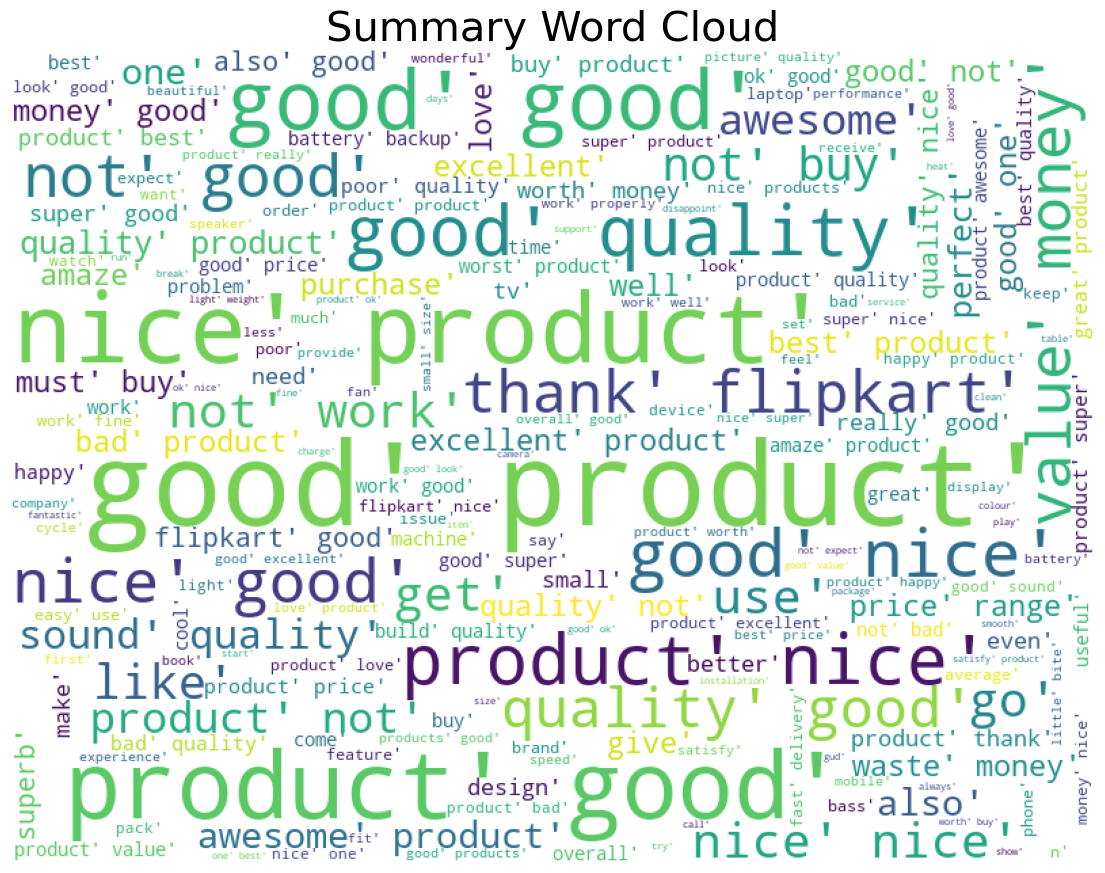

In [112]:
show_wordcloud(data,"Summary Word Cloud")

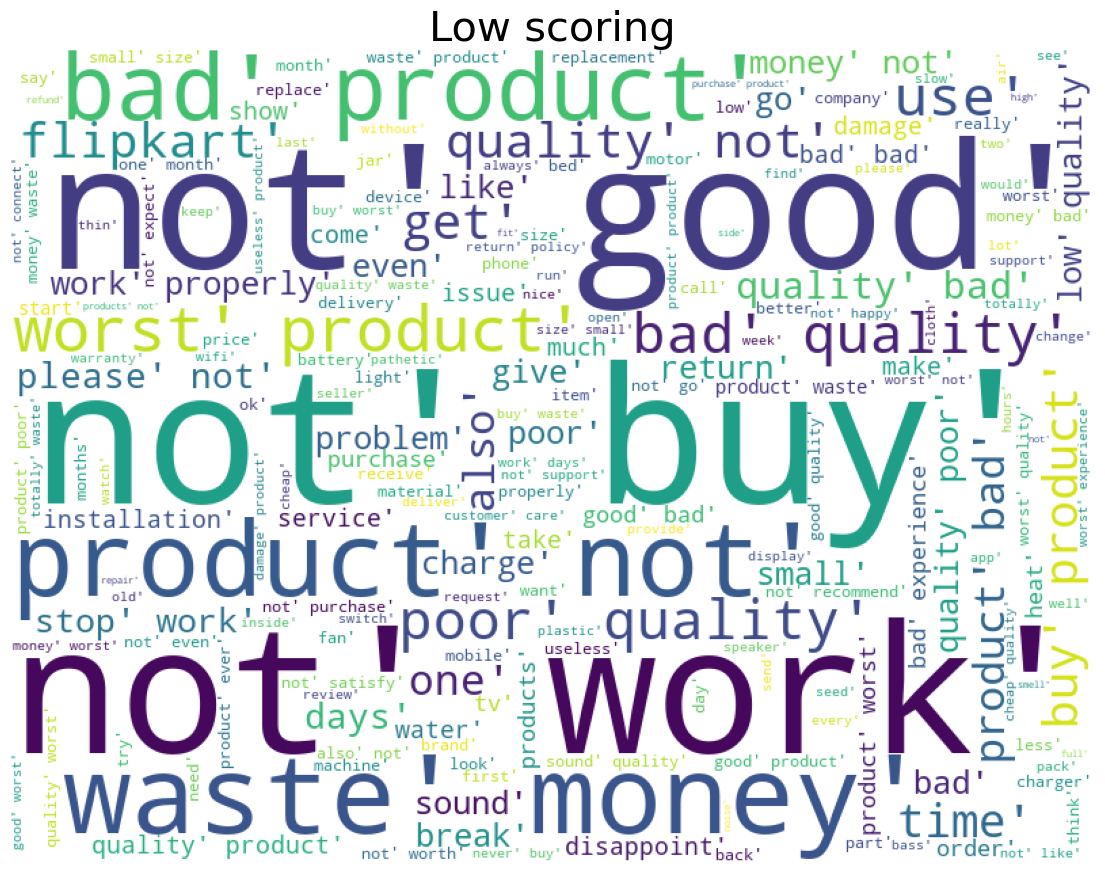

In [116]:
show_wordcloud(data[data.Rate == 1], title = "Low scoring")

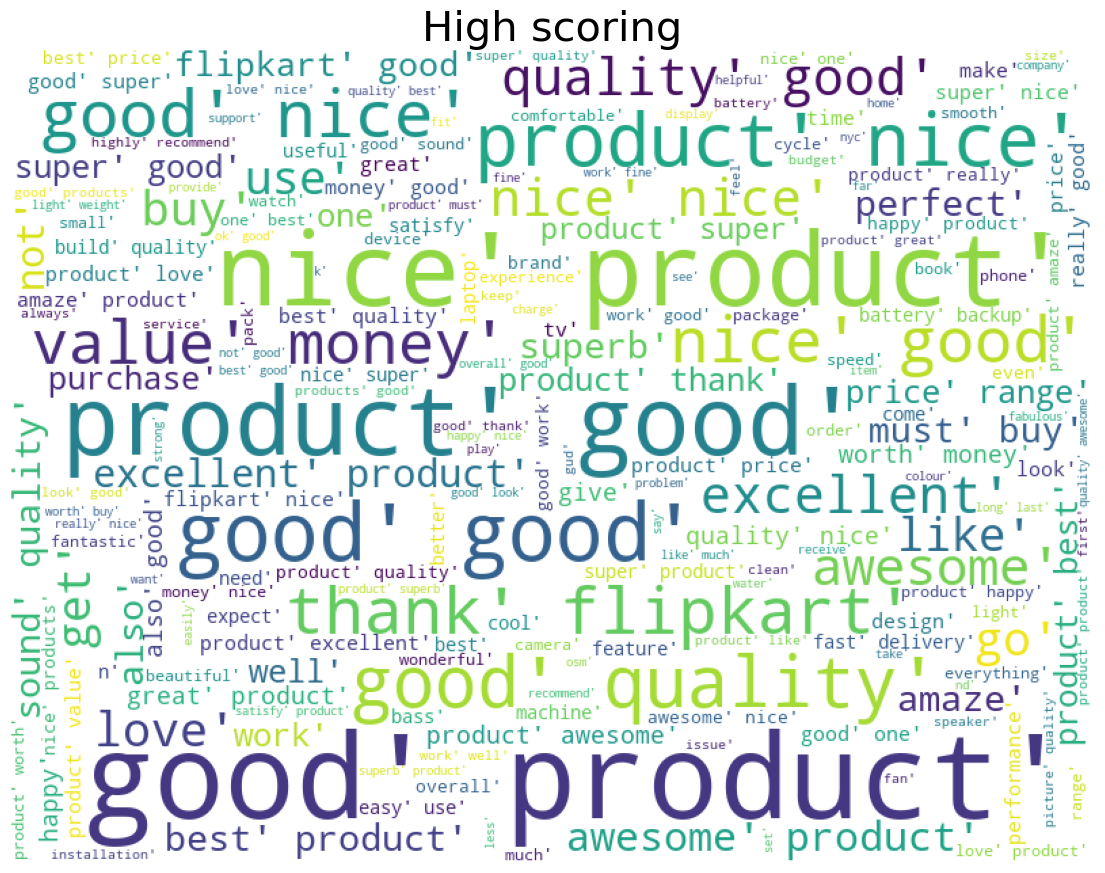

In [118]:
show_wordcloud(data[data.Rate == 5], title = "High scoring")

In [124]:
vec = CountVectorizer(max_features=4000)
data_features = vec.fit_transform(data['Review'])
data_features = data_features.toarray() 

In [128]:
data_features.shape

(180376, 1056)

In [132]:
labels = data['Rate']
labels = labels.astype('int')

In [134]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [138]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(x_train, y_train)

In [140]:
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.9408452490289836


In [144]:
clf = RandomForestClassifier(n_estimators = 20)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9397556964130616

In [146]:
result =  clf.predict(x_test)

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)

[[ 5173    20     5     7   307]
 [    7  1545     6     3    94]
 [   11     6  3270   655   325]
 [   11     1    26  9327  1628]
 [   13     1    23   111 31538]]


In [150]:
print(metrics.f1_score(y_test, result,average='micro'))

0.9397556964130616


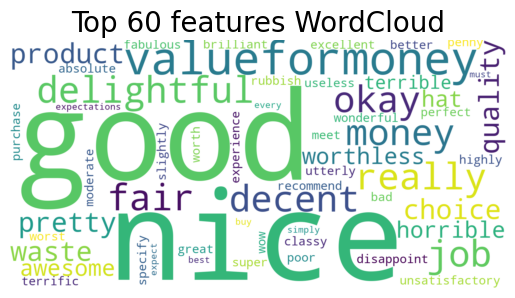

In [158]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:60])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(20, 15), frameon='equal')
plt.title('Top 60 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

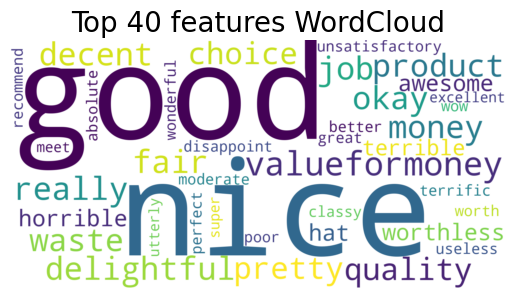

In [164]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:40])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(20, 15), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

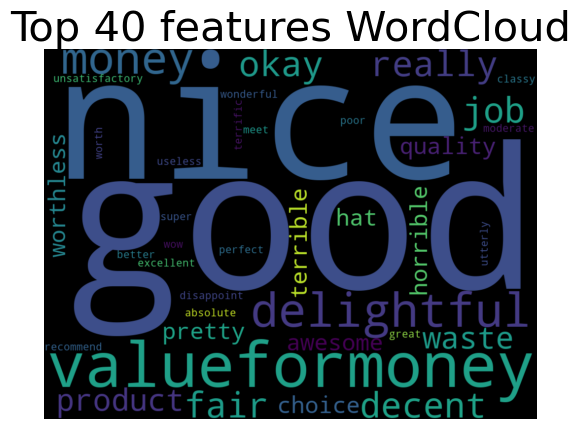

In [170]:
all_features = vec.get_feature_names_out()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '


from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000,
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()